# IQ tests for digitizer

### Author

Boris Nedyalkov, Quantum Computing Lab, IFAE, Barcelona

#### **In this notebook you will learn how to:**

* Import all the libraries one needs
* Set the working parameters of the machine
* Initialize the machine
* Create waveforms
* Download the waveforms to the Proteus
* Create a tasktable (sequences of pulses)
* Readout the signal [==UNDER DEVELOPEMENT==]
* Process the signal readout data [==UNDER DEVELOPEMENT==]

### Import some generic libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import time
import os

srcpath = os.path.realpath('../../SourceFiles')
sys.path.append(srcpath)

# These are the Tabor developers' libraries, they allow us to I/O interface with the Proteus
from teproteus import TEProteusAdmin as TepAdmin
from teproteus import TEProteusInst as TepInst

### Import our homemade libraries

In [2]:
import initializers  # this library contains intialization functions for the Proteus 

import pulse_lib # this library contains all the types of pulses, one can add here a new type of pulse if needed
import tasks # this library contains all the types of basic tasks, new ones can be added if need arises
import readers # this library contains all the readout functions

import helpers # this library contains auxillary functions

### Set the parameters of the machine

In [3]:
SCLK = 2.25e9 # sampling clock rate of the generator (AWG) ## max value 9e9
DUC_INTERP = 1  ### the DUC interpolator mode
DIG_SCLK = 2.25e9 # sampling clock rate of the digitizer (DAC) ## max value 2.7e9

SOURCE_NCO = 1e7   # The LO of the source/modulator
DDC_NCO = 1e7 # The LO of the demodulator (make ideally the same as Source NCO)

### Initialize the machine

In [4]:
# get the DAC mode, range, Serial port #, the data type of the system (8 or 16bit), and the instrument handle
dac_mode, max_dac, sid, data_type, inst = initializers.connection_func() # Make sure the Model name is P9484M, that the name of our module


=========CONNECTING=========
process id 22284
Connected to: Tabor Electronics,P9484M,000000220642,1.223.0
Model: P9484M
===CONNECTION ESTABLISHED===

===SYSTEM'S INFORMATION===
DAC waveform format: 16 bits-per-point
Max DAC wave-point level: 65535
Half DAC wave-point level: 32767.0
Number of channels: 4
Max segment number: 65536
Available memory per DDR: 8,581,545,984 wave-bytes
==========READY============


### Initialize the channels

In [5]:
# initialize channel 1
channel_numb = 1
initializers.initialization_func(channel_numb, inst, SCLK)

# # initialize all the channels
# for i in range(0,4):  
#     channel_numb = i + 1
#     initializers.initialization_func(channel_numb, inst, SCLK) 


===INITIALIZATION OF CHANNEL 1===  -->  ===DONE===
ERRORS: 0, no error


### Call the pulse library

In [6]:
pulse = pulse_lib.Pulse(SCLK, DUC_INTERP, show_plot = True)

##TEST IQ with simple square signals (I = 1, Q = 0)

In [7]:
##### TEST IQ
I = np.linspace (1,1,10000)
Q = I*0

inter_array = np.empty(len(I) + len(Q))
for i in range(0, len(I)):
    inter_array[0+i*2] = I[i]
    inter_array[1+i*2] = Q[i]
    
inter_array = helpers.digital_conv_func(inter_array, max_dac, data_type)

### Downloading some wave shapes onto the Proteus

In [8]:
wave1 = inter_array

In [9]:
# initialize the channel
channel_numb = 1
initializers.initialization_func(channel_numb, inst, SCLK)


===INITIALIZATION OF CHANNEL 1===  -->  ===DONE===
ERRORS: 0, no error


In [10]:
initializers.initialization_func_IQ(channel_numb, inst, SCLK, SOURCE_NCO)

@ When we download the signal onto the proteus we choose a segment number to assign to it, by this number we will refer to the signal later.

In [11]:
# download signal to an approprate 'channel' and 'segment of the channel'
helpers.download_func (inst, wave1, channel = 1, segment = 1)

wave size: 20000
0, no error


### Let us now define a tasktable (as sequence of pulses and actions)

In [12]:
task = tasks.Task(inst)

In [13]:
channel = 1
segment_number = 1

task.solid_task(inst, channel, segment_number)
helpers.start_task(inst, channel)

0, no error
0, no error


In [14]:
# def digitizer_setup(DIG_SCLK, DDC_NCO, time_delay):

#     inst.send_scpi_cmd(':DIG:MODE DUAL')
#     inst.send_scpi_cmd(':DIG:CHAN:RANGe HIGH')

#     resp = inst.send_scpi_query(':SYST:ERR?')
#     print(resp)


#     # set the sampling rate for the Digitizer (or ADC)
#     inst.send_scpi_cmd(':DIG:FREQ {0}'.format(DIG_SCLK))

#     # Set DDC mode to complex
#     resp = inst.send_scpi_cmd(':DIG:DDC:MODE COMP')
#     print(resp)

#     resp = inst.send_scpi_cmd(':DIG:DDC:DEC X16')
#     print(resp)

#     resp = inst.send_scpi_query(':DIG:DDC:CLKS DIG')  # !!! doesn't work, must be "...CLKS AWG"
#     print(resp)

#     resp = inst.send_scpi_query(':SYST:ERR?')
#     print(resp)

#     ###########################################

#     #This is to be used only for mode COMPLEX (not mode REAL)
#     # Set center frequency of channel 1 to 100MHz  
#     # DDC_NCO = 1e9   # !!!!! use the frequency of you pulse here !!!!!
#     inst.send_scpi_cmd(':DIG:DDC:CFR1 {0}'.format(DDC_NCO))

#     ###########################################

#     resp = inst.send_scpi_query(':SYST:ERR?')
#     print(resp)

#     # Enable capturing data from channel 1
#     inst.send_scpi_cmd(':DIG:CHAN:SEL 1')
#     inst.send_scpi_cmd(':DIG:CHAN:STATE ENAB')

#     # # Select the internal-trigger as start-capturing trigger:
#     # inst.send_scpi_cmd(':DIG:TRIG:SOURCE CPU') 

#     # Select the task trigger as start-capturing trigger:
#     inst.send_scpi_cmd(':DIG:TRIG:SOURCE TASK1')

#     # Set Trigger AWG delay to 0
#     inst.send_scpi_cmd(':DIG:TRIG:AWG:TDEL {0}'.format(time_delay))  ##!!! Don't know if it should be like this

#     resp = inst.send_scpi_query(':SYST:ERR?')
#     print(resp)
    
#     return None
    
time_delay=0
readers.digitizer_setup(inst, DIG_SCLK, DDC_NCO, time_delay)

0, no error
0
0

0, no error
0, no error
0, no error


In [15]:
# # Allocate four frames of 4800 samples
# numframes, framelen = 1, 10*4800
# cmd = ':DIG:ACQuire:FRAM:DEF {0},{1}'.format(numframes, framelen)
# inst.send_scpi_cmd(cmd)

# # Select which frames are filled with captured data (all frames in this example)
# inst.send_scpi_cmd(':DIG:ACQ:FRAM:CAPT:ALL');

# # clean memory
# inst.send_scpi_cmd(':DIG:ACQ:ZERO:ALL')

# resp = inst.send_scpi_cmd(':DIG:DATA:FORM?')
# print (resp)


# resp = inst.send_scpi_query(':SYST:ERR?')
# print(resp)

# resp = inst.send_scpi_query(':DIG:DDC:DEC?')  # try with this maybe
# print(resp)

numframes, framelen = 1, 10*4800
readers.framer(inst, numframes, framelen)

0
0, no error
X16


C:\Users\QCTlab\Documents\GitHub\Proteus-drivers\SourceFiles\teproteus.py:840: UserWarning: CMD: ":DIG:DATA:FORM?", SYST:ERR: U16;0, no error
  warnings.warn(wrnmsg)


# DSP Setup

In [16]:
# # Select to store the IQ data
# inst.send_scpi_cmd(':DSP:STOR1 DIRect1')
# resp = inst.send_scpi_query(':SYST:ERR?')
# print(resp)

# # Set IQ PATH Input to AMPH
# inst.send_scpi_cmd(':DSP:DEC:IQP:SEL 1')
# resp = inst.send_scpi_query(':SYST:ERR?')
# print(resp)

# inst.send_scpi_cmd(':DSP:DEC:IQP:INP AMPH')
# resp = inst.send_scpi_query(':SYST:ERR?')
# print(resp)

# # Set Decision frame size 50 points
# inst.send_scpi_cmd(':DSP:DEC:FRAM {0}'.format(50))
# resp = inst.send_scpi_query(':SYST:ERR?')
# print(resp)

In [17]:
# # # Clean memory 
# # inst.send_scpi_cmd(':DIG:ACQ:ZERO:ALL')  ## !!!! try with and without this, when everything is running OK
# # time.sleep(1)

# # Stop the digitizer's capturing machine (to be on the safe side)
# inst.send_scpi_cmd(':DIG:INIT OFF')
# time.sleep(0.1)

# # Start the digitizer's capturing machine ###################### START CAPTURE
# inst.send_scpi_cmd(':DIG:INIT ON')

# for i in range (1,100):
#     delta_t = 1/100
#     time.sleep(delta_t) # if we wait long enough time the machine captures a signal
#     resp = inst.send_scpi_query(':DIG:ACQuire:FRAM:STAT?')
#     if resp[6:] == '1':  # maybe 1 comes as a float, check it
#         print('Response:',resp, 'Time:',delta_t*i)
#         break

        
# # Stop the digitizer's capturing machine (to be on the safe side) ################# STOP CAPTURE
# inst.send_scpi_cmd(':DIG:INIT OFF')

# resp = inst.send_scpi_query(':SYST:ERR?')
# print(resp)
readers.capturer(inst)

Response: 1,1,0,1 Time: 0.01
0, no error


In [18]:
# # Choose what to read 
# # (only the frame-data without the header in this example)
# inst.send_scpi_cmd(':DIG:DATA:TYPE FRAM')

# # Choose which frames to read (all in this example)
# inst.send_scpi_cmd(':DIG:DATA:SEL ALL')

# # Get the total data size (in bytes)
# resp = inst.send_scpi_query(':DIG:DATA:SIZE?')
# num_bytes = np.uint32(resp)
# print('Total size in bytes: ' + resp)
# print()

# # Read the data that was captured by channel 1:
# inst.send_scpi_cmd(':DIG:CHAN:SEL 1')

# #wavlen = num_bytes // 2
# wavlen = num_bytes // 4  # for the DUC mode !!!!!

# #wav1 = np.zeros(wavlen, dtype=np.uint16)
# wav1 = np.zeros(wavlen, dtype=np.uint32) # for the DUC mode !!!!!

# rc = inst.read_binary_data(':DIG:DATA:READ?', wav1, num_bytes)

# # # Read the data that was captured by channel 2:
# # inst.send_scpi_cmd(':DIG:CHAN:SEL 2')

# # wav2 = np.zeros(wavlen, dtype=np.uint16)
# # rc = inst.read_binary_data(':DIG:DATA:READ?', wav2, num_bytes)

# resp = inst.send_scpi_query(':SYST:ERR?')
# print(resp)

In [19]:
# # Plot the samples
# totlen = int(numframes * framelen /2)
# x = range(totlen)

# wave_i = np.zeros(totlen, dtype=np.int32)
# wave_q = np.zeros(totlen, dtype=np.int32)


In [20]:
# # wave_i = wav1[::2]
# # wave_q = wav1[1::2]

# ####wave_i, wave_q = readers.IQ_data_extractor(inst, channel = 1)

# plt.plot(x, wave_i, '-',x, wave_q, '-')

In [21]:
# wave_i = wave_i.astype('int32')
# wave_q = wave_q.astype('int32')

In [22]:
# wave_i = wave_i - 16384
# wave_q = wave_q - 16384

In [24]:
wave_i, wave_q = readers.IQ_data_extractor(inst, channel, numframes, framelen)

Total size in bytes: 192000

0, no error


In [25]:
wave_i

array([16383, 10265, -3611, ..., 15849, 16178,  5074])

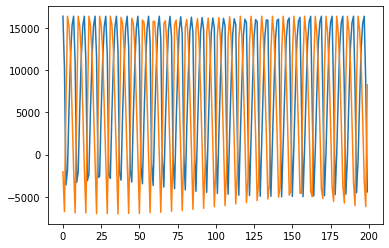

In [30]:
plt.plot(wave_i[0:200], '-', wave_q[0:200], '-')

In [28]:
#########################################

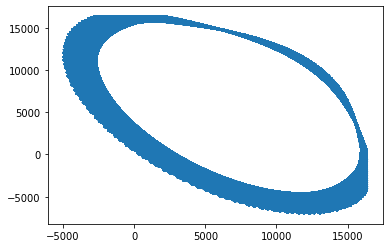

In [29]:
plt.plot (wave_i, wave_q)

## Test IQ with a sequence of pulses (gaussian + wait_time + readout)

In [1]:
# Choose signals

# Some pulse
IF_frequency = 10e9 # in Hz
amplitude = 1
sigma = 1e-7 # in seconds
width = 5*sigma # in seconds
beta = 1e-6
I_to_Q_ratio = 1.0
pulse1_i, pulse1_q  = pulse.gaussian_I_Q_with_IF(IF_frequency, amplitude, width, sigma, beta, I_to_Q_ratio)[0:2]

# Some time delay
time_delay = 3e-6 # time delay in seconds
time_delay_pulse1 = pulse.blank_signal_arbitrary(time_delay)

# Signal compiler
final_pulse_i = helpers.concatenator(pulse1_i, time_delay_pulse1)
final_pulse_q = helpers.concatenator(pulse1_q, time_delay_pulse1)

time_before_readout = len(final_pulse_i)/SCLK # time for the sequence to complete
print ("\nTime before readout is {0} sec".format(time_before_readout))

# Readout pulse
amplitude = 1
width_slope = 100e-9 # in sec
width_plateau = 10e-6 # in sec
frequency = 1e6 # some dummy frequency
# here we assume that the local oscillator (NCO) is set at the frequency of the readout resonator, thus we just use envelope (IF=0)
readout_pulse = pulse.readout_pulse(amplitude, width_slope, width_plateau, frequency)[2] # this instance creates 3 arrays, only the last is the envelop

readout_time = len(readout_pulse)/SCLK # time for the readout to complete
print ("\nTime for readout is {0} sec".format(readout_time))

# Add the readout pulse
final_pulse_i = helpers.concatenator(final_pulse_i, readout_pulse)
final_pulse_q = helpers.concatenator(final_pulse_q, readout_pulse*0)

# Add cooldown time (to allow for complete qubit relaxation)
cooldown_time = 10e-6 # cooldown time in sec
cooldown_space = pulse.blank_signal_arbitrary(cooldown_time)

final_pulse_i = helpers.concatenator(final_pulse_i, cooldown_space)
final_pulse_q = helpers.concatenator(final_pulse_q, cooldown_space)

# Add remnant (to have the apprpriate format number of bits, to feed to the proteus memory)
remnant_length = helpers.formatter_for_sequences(len(final_pulse_i))
remnant = np.linspace(0, 0, remnant_length)

final_pulse_i = helpers.concatenator(final_pulse_i, remnant)
final_pulse_q = helpers.concatenator(final_pulse_q, remnant)

NameError: name 'pulse' is not defined

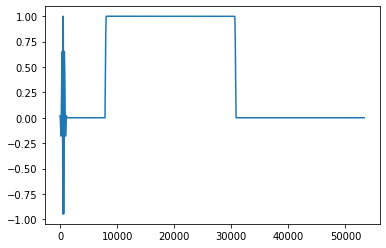

In [66]:
plt.plot(final_pulse_i)

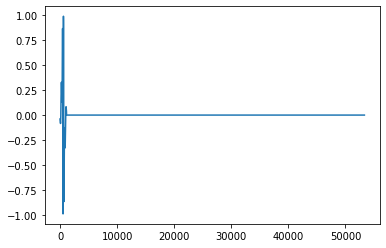

In [67]:
plt.plot(final_pulse_q)

### Sequence to close the instrument

In [ ]:
admin = TepAdmin()  ### decalring a shortcut to send SCPY commands to the machine
inst = admin.open_instrument(slot_id=sid)  ### decalring a shortcut to send SCPY commands to the machine

inst.close_instrument()
admin.close_inst_admin()